## FINAL SUBMISSION PROJECT
Please fill out:

Student name: MIKA BENSON WAMBUA Student pace: Part time Scheduled project review date/time: 13/3/2023 Instructor name: William Okomba Blog post URL:

## OVERVIEW
This repo looks intently on the Aircraft Risk Evaluation by accessing the various aircraft models for either commercial or private enterprises. For instance, some of the key risk factors would include: safety records, maintainance complexity and the historical performance based on the accidents recorded over the years from 1962 - 2023.

## BUSINESS PROBLEM
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase

## THE DATA
The data we were given the following sources:

1. From the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

2. Pulled from Kaggle dataset, here is the link: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses


## DATA PREPARATION AND CLEANING
# objectives

1. Load files using python built-in packages
2. Look at information about data and column
3. Data cleaning by fixing any missing or incorrect value
4. Ensure wanted observations are well structured.
5. Visualize the dataset
6. Give the Recommendation necessary based on the Business problem.


## step_1. Loading the files using the python built-in packages..

In [1]:
# numpy for high level mathematical functions and working with Arrays
import numpy as np
# pandas data manipulation and analysis for tablular data
import pandas as pd
#seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import chardet

# Loading the datasets..

The two csv files (comma separated file): AviationData.csv and USState_codes.csv had to be downloaded from Kaggle which came as a zip file. It was necessary to copy the two files and save it on phase1_proj folder.

In [3]:
df = pd.read_csv("USState_codes.csv", index_col = 0)
df.head()

,Abbreviation
US_State,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [4]:
df_1 = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', dtype={'column_6_name': str, 'column_7_name': float, 'column_28_name': int})

<ipython-input-4-4622e460246d>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', dtype={'column_6_name': str, 'column_7_name': float, 'column_28_name': int})


In [5]:
df_1 = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', low_memory=False)

In [6]:
df_1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Step_2 ..Inspecting the two dataset..

Inspecting of these dataset is a crucial procedure in ensuring the data analysis is accurate through understanding the data structure and the content which ensures correct data types in preparation of the data cleaning process

# Consider the first dataset..

# df (USState_codes.csv)

In [7]:
# To check top 10 rows on the dataset
df.head(10)

,Abbreviation
US_State,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA
Colorado,CO
Connecticut,CT
Delaware,DE
Florida,FL


In [8]:
# To check for the columns
df.columns

Index(['Abbreviation'], dtype='object')

In [9]:
# To provide a summary of categorical columns,to understand their distribution, frequency and uniqueness,
# which is important for data analysis and preprocessing.

df.describe(include = "object")

,Abbreviation
count,62
unique,62
top,AL
freq,1


In [10]:
# To check the number of rows and columns respectively

df.shape
print(f"My first dataset has {df.shape[0]} rows and {df.shape[1]} columns")

My first dataset has 62 rows and 1 columns


In [11]:
# Here we provide a summary of the DataFrame, focusing on the number of columns, their data types,
# and memory usage, without listing out every column individually.

df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, Alabama to Pacific ocean
Columns: 1 entries, Abbreviation to Abbreviation
dtypes: object(1)
memory usage: 992.0+ bytes


In [12]:
# To check for any missing values
# for this dataset there are no missing value
df.isna().sum()

Abbreviation    0
dtype: int64

## Consider the second dataset..

# df_1 (AviationData.csv)

In [13]:
# To check the first 10 rows in the dataset

df_1.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [14]:
# To check the number of rows and columns respectively..

df_1.shape

(88889, 31)

In [15]:
print(f"The second dataset contains {df_1.shape[0]} rows and {df_1.shape[1]} columns")

The second dataset contains 88889 rows and 31 columns


In [16]:
# To check the columns 

df_1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [17]:
# To check the statistical summary for each column..

df_1.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [18]:
# To provide a summary of categorical columns,to understand their distribution, frequency and uniqueness,
# which is important for data analysis and preprocessing.

df_1.describe(include = "object")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [19]:
# To display the data types of each column in the DataFrame..

df_1.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [20]:
"""

The data types tend to line up with what we expect from the dataset. Since the columns 
containing strings are type object, while for the columns containing decimals numbers include (Number.of.Engines,Total.Fatal
Injuries, Total.Serious.Injuries, Total.Uninjured) are type float64

There are also missing NaN values in most of the columns, considering
that there are 88889 rows and in each of the columns listed above seem to have fewer number of 
88889 non-null values.

"""

'\n\nThe data types tend to line up with what we expect from the dataset. Since the columns \ncontaining strings are type object, while for the columns containing decimals numbers include (Number.of.Engines,Total.Fatal\nInjuries, Total.Serious.Injuries, Total.Uninjured) are type float64\n\nThere are also missing NaN values in most of the columns, considering\nthat there are 88889 rows and in each of the columns listed above seem to have fewer number of \n88889 non-null values.\n\n'

In [21]:
# Here we provide a summary of the DataFrame, focusing on the number of columns, their data types,
# and memory usage, without listing out every column individually.

df_1.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


## Step_3.. Data cleaning by fixing any missing or incorrect value

# Data cleaning implies the process of identifying the inconsistencies and inaccuracies in the dataset to ensure seemlessly task when handling data during analysis.

# There are two common methods for dealing with missing values:
1. Removing the data (rows and columns) with the missing values

2. Imputation which refers to the process of filling in the missing values in the dataset with estimated or substituted values



In [22]:
# To check for missing values in the df(USState_codes.csv)
# The firt dataset has no missing values..
df.isnull().any()

Abbreviation    False
dtype: bool

In [23]:
# To check for any missing values
# for this dataset there a number of the missing value
df_1.isna().sum().sort_values(ascending = False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [24]:
# Creating the function that checks for missing values 
def identify_missing_values(df_1): # this creates a function that identify whether the df_1 contains missing values
    """ To check whether the dataframe contains missing values """
    
    missing = [] # initialize an empty list which stores boolean values indicating whether each column in dataframe
                 # has missing values
    
    for i in df_1.isnull().any(): # here we loop through the column to check for missing values 
        missing.append(i)         # the for loop iterates over the boolean values from the return series where each value 
                                  # value in i is appended to the empty list in missing..
            
    missing_set = set(missing)    # here we are converting the missing to set.
    
    
    if (len(missing_set) == 1):  # The function checks the len(missing_set) where each value in the set are either true or 
                                 # false depending on the condition
        print("The dataset has no missing values")
        
    else:
        print("The dataset has missing values")
        
    return  # the function returns the output of the print statements which is None..

identify_missing_values(df_1)


The dataset has missing values


In [25]:
# To check the total number of the null values 
df_1.isnull().sum().sum()

564742

In [26]:
# To check for duplicate values.. 

df_1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

# Removing columns that are not necessary to the data analysis

In [27]:
df_1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [28]:
df_1.shape

(88889, 31)

In [29]:
# Removing unnecessary columns in the dataframe..
df2 = df_1.drop(columns = ['Accident.Number', 'Schedule','Air.carrier', 'Airport.Code', 'Airport.Name',
                                'FAR.Description', 'Registration.Number','Broad.phase.of.flight','Weather.Condition', 
                          'Publication.Date'])
df2.head()


,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,NaN,...,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,NaN,...,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,NaN,...,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,NaN,...,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,NaN,...,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,Probable Cause


In [30]:
df2.shape

(88889, 21)

In [31]:
df2.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Latitude', 'Longitude', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Report.Status'],
      dtype='object')

In [32]:
# Filtering the location column..
df2["Abbreviation"] = df2["Location"].str.split(',').str[1].str.strip()
df2["Abbreviation"]

0        ID
1        CA
2        VA
3        CA
4        OH
         ..
88884    MD
88885    NH
88886    AZ
88887    UT
88888    GA
Name: Abbreviation, Length: 88889, dtype: object

In [33]:
# Remove the rows with few missing values..
df2 = df2.dropna(subset = ['Location', 'Make', 'Model', 'Amateur.Built', 'Country', 'Purpose.of.flight', 
                           'Aircraft.damage', 'Report.Status', 'Longitude', 'Latitude', 'Abbreviation'])
df2.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,NaN,...,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,Probable Cause,VA
593,20080417X00504,Accident,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,Fatal(1),Substantial,Airplane,...,No,1.0,Reciprocating,Unknown,1.0,NaN,NaN,NaN,Probable Cause,AL
3654,20051208X01953,Accident,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,Fatal(2),Destroyed,NaN,...,No,1.0,Reciprocating,Personal,2.0,NaN,NaN,NaN,Probable Cause,WA
6202,20020904X01525,Accident,1983-09-09,"Kalispell, MT",United States,48.12,-113.8875,Fatal(2),Destroyed,NaN,...,No,1.0,Reciprocating,Personal,2.0,NaN,NaN,NaN,Probable Cause,MT
24567,20021022X05356,Accident,1989-12-01,"ENGADINE, MI",United States,46.154444,-85.663611,Fatal(1),Substantial,NaN,...,No,1.0,Reciprocating,Personal,1.0,NaN,NaN,NaN,Probable Cause,MI


In [34]:
df2.isna().sum().sort_values(ascending = False)

Total.Serious.Injuries    9212
Total.Minor.Injuries      8641
Total.Fatal.Injuries      8304
Aircraft.Category         7350
Total.Uninjured           4412
Engine.Type               1014
Number.of.Engines          863
Injury.Severity             14
Event.Id                     0
Amateur.Built                0
Report.Status                0
Purpose.of.flight            0
Model                        0
Investigation.Type           0
Make                         0
Aircraft.damage              0
Longitude                    0
Latitude                     0
Country                      0
Location                     0
Event.Date                   0
Abbreviation                 0
dtype: int64

In [35]:
# analysis for the Injury.Severity
df2['Injury.Severity'].value_counts()

Non-Fatal      22462
Fatal           2793
Fatal(1)        1213
Fatal(2)         743
Fatal(3)         224
Fatal(4)         124
Incident          77
Minor             70
Fatal(5)          43
Serious           31
Fatal(6)          19
Fatal(7)           6
Fatal(10)          4
Fatal(8)           3
Unavailable        3
Fatal(9)           1
Fatal(26)          1
Fatal(13)          1
Name: Injury.Severity, dtype: int64

In [36]:
df2['Injury.Severity'].value_counts().head()[0]

22462

In [37]:
# Here we try to find the value which appears most frequent in the Injury.Severity column..
df2['Injury.Severity'].value_counts().idxmax()

'Non-Fatal'

In [38]:
# Filling in the missing value in the Injury.Severity column with 'Non_fatal'
df2['Injury.Severity'].fillna('Non_fatal', inplace = True)

In [39]:
df2.isna().sum().sort_values(ascending = False)

Total.Serious.Injuries    9212
Total.Minor.Injuries      8641
Total.Fatal.Injuries      8304
Aircraft.Category         7350
Total.Uninjured           4412
Engine.Type               1014
Number.of.Engines          863
Event.Id                     0
Amateur.Built                0
Report.Status                0
Purpose.of.flight            0
Model                        0
Investigation.Type           0
Make                         0
Aircraft.damage              0
Injury.Severity              0
Longitude                    0
Latitude                     0
Country                      0
Location                     0
Event.Date                   0
Abbreviation                 0
dtype: int64

In [40]:
# Removing missing values in ..Aircraft.Category
df2['Aircraft.Category'].value_counts()

Airplane             17620
Helicopter            1957
Glider                 404
Weight-Shift           149
Gyrocraft              135
Balloon                102
Powered Parachute       84
Ultralight              23
Blimp                    4
Powered-Lift             2
Unknown                  1
WSFT                     1
Name: Aircraft.Category, dtype: int64

In [41]:
df2['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Blimp', 'Glider', 'Gyrocraft',
       'Balloon', 'Ultralight', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Unknown', 'WSFT'], dtype=object)

In [42]:
# filter the data in the Aircraft category to include the values with no missing values..df2 
df2 = df2[~df2['Aircraft.Category'].isna()]
df2.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation
593,20080417X00504,Accident,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,Fatal(1),Substantial,Airplane,...,No,1.0,Reciprocating,Unknown,1.0,NaN,NaN,NaN,Probable Cause,AL
31353,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,No,NaN,Reciprocating,Personal,1.0,1.0,NaN,NaN,Probable Cause,TX
42691,20001208X08803,Accident,1997-09-14,"St. Ignaces, MI",United States,45.928334,-84.825556,Fatal(2),Destroyed,Airplane,...,No,1.0,Reciprocating,Personal,2.0,NaN,NaN,NaN,Probable Cause,MI
48128,20001212X20873,Accident,2000-04-05,"MARIANNA, FL",United States,1.483333,-75.533333,Fatal(3),Destroyed,Airplane,...,No,2.0,Turbo Fan,Instructional,3.0,NaN,NaN,NaN,Probable Cause,FL
49928,20010123X00344,Accident,2001-01-09,"OAKLAND, CA",United States,37.724445,-122.223334,Non-Fatal,Substantial,Blimp,...,No,1.0,Reciprocating,Instructional,NaN,NaN,2.0,NaN,Probable Cause,CA


In [43]:
# Here we filter the dataset to include the rows in Purpose.of.flight column..
df3 = df2[df2['Purpose.of.flight'].isin(['Public Aircraft', 'Public Aircraft - Local', 'Personal', 'Business'])]

In [44]:
df3['Purpose.of.flight'].value_counts()

Personal                   13735
Business                     496
Public Aircraft - Local       56
Public Aircraft               45
Name: Purpose.of.flight, dtype: int64

In [45]:
df3['Purpose.of.flight'].unique()

array(['Personal', 'Business', 'Public Aircraft',
       'Public Aircraft - Local'], dtype=object)

In [46]:
df2 = df3.copy(deep = True)

In [47]:
# Applying multiple aggregation function on the columns below to deal missing value in 
df2[["Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Fatal.Injuries","Total.Uninjured",
                   "Number.of.Engines"]].agg(['sum', 'max', 'median', 'mean'])


,Total.Serious.Injuries,Total.Minor.Injuries,Total.Fatal.Injuries,Total.Uninjured,Number.of.Engines
sum,3333.000000,2611.00000,3880.000000,14943.00000,14613.000000
max,9.000000,6.00000,26.000000,38.00000,8.000000
median,0.000000,0.00000,0.000000,1.00000,1.000000
mean,0.272928,0.20873,0.319184,1.08165,1.047002


In [48]:
df2["Total.Serious.Injuries"].fillna(0, inplace = True)
df2["Total.Minor.Injuries"].fillna(0, inplace = True)
df2["Total.Fatal.Injuries"].fillna(0, inplace = True)
df2["Total.Uninjured"].fillna(0, inplace = True)
df2["Number.of.Engines"].fillna(0, inplace = True)

In [49]:
df2.isna().sum()

Event.Id                    0
Investigation.Type          0
Event.Date                  0
Location                    0
Country                     0
Latitude                    0
Longitude                   0
Injury.Severity             0
Aircraft.damage             0
Aircraft.Category           0
Make                        0
Model                       0
Amateur.Built               0
Number.of.Engines           0
Engine.Type               429
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Report.Status               0
Abbreviation                0
dtype: int64

In [50]:
df2.shape

(14332, 22)

In [51]:
df2["Engine.Type"].value_counts()
# converting the categorical type to list..
mode = df3["Engine.Type"].value_counts().index.tolist()
mode[0]

'Reciprocating'

In [52]:
# Filling the missing value with the most common value which is the Reciprocating..
df2["Engine.Type"].fillna(mode[0], inplace = True)

In [53]:
df2.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Report.Status             0
Abbreviation              0
dtype: int64

## Step 4.. Ensuring the wanted observations are well structured

# Since there are no missing values in the dataset, the next step is to filter the data that is relevant the perform analysis on.

# Here we can either filter the data to include or checking the specific rows in the dataset


In [54]:
# Selecting the country column 
# filtering to have United States as the Country
df3 = df2[df2["Country"] == "United States"]
df3.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation
31353,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,No,0.0,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX
42691,20001208X08803,Accident,1997-09-14,"St. Ignaces, MI",United States,45.928334,-84.825556,Fatal(2),Destroyed,Airplane,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause,MI
49991,20010206X00396,Accident,2001-01-24,"Nashville, TN",United States,36.13,-86.653889,Fatal(4),Destroyed,Airplane,...,No,2.0,Turbo Prop,Business,4.0,0.0,0.0,0.0,Probable Cause,TN
50289,20010405X00697,Accident,2001-03-30,"CROSS CITY, FL",United States,29.635555,-83.104722,Non-Fatal,Substantial,Airplane,...,No,1.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,Probable Cause,FL
50349,20010417X00765,Accident,2001-04-09,"Vero Beach, FL",United States,27.649722,-80.439166,Fatal(2),Destroyed,Airplane,...,No,1.0,Turbo Prop,Personal,2.0,0.0,0.0,0.0,Probable Cause,FL


In [55]:
df3.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation
31353,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,No,0.0,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX
42691,20001208X08803,Accident,1997-09-14,"St. Ignaces, MI",United States,45.928334,-84.825556,Fatal(2),Destroyed,Airplane,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause,MI
49991,20010206X00396,Accident,2001-01-24,"Nashville, TN",United States,36.13,-86.653889,Fatal(4),Destroyed,Airplane,...,No,2.0,Turbo Prop,Business,4.0,0.0,0.0,0.0,Probable Cause,TN
50289,20010405X00697,Accident,2001-03-30,"CROSS CITY, FL",United States,29.635555,-83.104722,Non-Fatal,Substantial,Airplane,...,No,1.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,Probable Cause,FL
50349,20010417X00765,Accident,2001-04-09,"Vero Beach, FL",United States,27.649722,-80.439166,Fatal(2),Destroyed,Airplane,...,No,1.0,Turbo Prop,Personal,2.0,0.0,0.0,0.0,Probable Cause,FL


In [56]:
df3.shape

(14278, 22)

In [98]:
# Convert Event.Date from object to datetime
df3 = df3.copy()
df3['Event.Date'] = pd.to_datetime(df3['Event.Date'])

In [99]:
# The Event.Date has been converted to datetime64[ns] datatype..
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14278 entries, 31353 to 88767
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                14278 non-null  object        
 1   Investigation.Type      14278 non-null  object        
 2   Event.Date              14278 non-null  datetime64[ns]
 3   Location                14278 non-null  object        
 4   Country                 14278 non-null  object        
 5   Latitude                14278 non-null  object        
 6   Longitude               14278 non-null  object        
 7   Injury.Severity         14278 non-null  object        
 8   Aircraft.damage         14278 non-null  object        
 9   Aircraft.Category       14278 non-null  object        
 10  Make                    14278 non-null  object        
 11  Model                   14278 non-null  object        
 12  Amateur.Built           14278 non-null  ob

In [101]:
# Extract the year
df3['Event.Year'] = df3['Event.Date'].dt.year

In [102]:
df3.head(4)

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation,Event.Year
31353,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,0.0,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX,1992
42691,20001208X08803,Accident,1997-09-14,"St. Ignaces, MI",United States,45.928334,-84.825556,Fatal(2),Destroyed,Airplane,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause,MI,1997
49991,20010206X00396,Accident,2001-01-24,"Nashville, TN",United States,36.13,-86.653889,Fatal(4),Destroyed,Airplane,...,2.0,Turbo Prop,Business,4.0,0.0,0.0,0.0,Probable Cause,TN,2001
50289,20010405X00697,Accident,2001-03-30,"CROSS CITY, FL",United States,29.635555,-83.104722,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,Probable Cause,FL,2001


In [103]:
# Analysis for the Investigation.Type...
df3["Investigation.Type"].value_counts()

Accident    14204
Incident       74
Name: Investigation.Type, dtype: int64

In [62]:
df3.groupby("Investigation.Type").sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
Investigation.Type,,,,,,
Accident,14493.0,3754.0,3316.0,2604.0,14724.0,28584004
Incident,92.0,0.0,3.0,0.0,191.0,148786


In [104]:
# To group the dataframe by the values in the Investigation.Type column then compute the sum of the numerical columns
df4 = df3[df3["Investigation.Type"] == "Accident"]
df4.head()


,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation,Event.Year
31353,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,0.0,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX,1992
42691,20001208X08803,Accident,1997-09-14,"St. Ignaces, MI",United States,45.928334,-84.825556,Fatal(2),Destroyed,Airplane,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause,MI,1997
49991,20010206X00396,Accident,2001-01-24,"Nashville, TN",United States,36.13,-86.653889,Fatal(4),Destroyed,Airplane,...,2.0,Turbo Prop,Business,4.0,0.0,0.0,0.0,Probable Cause,TN,2001
50289,20010405X00697,Accident,2001-03-30,"CROSS CITY, FL",United States,29.635555,-83.104722,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,Probable Cause,FL,2001
50349,20010417X00765,Accident,2001-04-09,"Vero Beach, FL",United States,27.649722,-80.439166,Fatal(2),Destroyed,Airplane,...,1.0,Turbo Prop,Personal,2.0,0.0,0.0,0.0,Probable Cause,FL,2001


## Step 5 .. Visualize the data 

In [64]:
# Performing a univariate analysis on the Number.of.Engines..
# Histogram for Number of Engines to check the distribution


In [105]:
df4["Number.of.Engines"]

31353    0.0
42691    1.0
49991    2.0
50289    1.0
50349    1.0
        ... 
88638    1.0
88639    1.0
88647    1.0
88661    2.0
88767    1.0
Name: Number.of.Engines, Length: 14204, dtype: float64

In [110]:
df4 = df3.copy()
df4['Number.of.Engines'] = df4['Number.of.Engines']. astype(int)
df4['Number.of.Engines']

31353    0
42691    1
49991    2
50289    1
50349    1
        ..
88638    1
88639    1
88647    1
88661    2
88767    1
Name: Number.of.Engines, Length: 14278, dtype: int32

In [111]:
df4.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation,Event.Year
31353,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,0,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX,1992
42691,20001208X08803,Accident,1997-09-14,"St. Ignaces, MI",United States,45.928334,-84.825556,Fatal(2),Destroyed,Airplane,...,1,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause,MI,1997
49991,20010206X00396,Accident,2001-01-24,"Nashville, TN",United States,36.13,-86.653889,Fatal(4),Destroyed,Airplane,...,2,Turbo Prop,Business,4.0,0.0,0.0,0.0,Probable Cause,TN,2001
50289,20010405X00697,Accident,2001-03-30,"CROSS CITY, FL",United States,29.635555,-83.104722,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Personal,0.0,0.0,2.0,0.0,Probable Cause,FL,2001
50349,20010417X00765,Accident,2001-04-09,"Vero Beach, FL",United States,27.649722,-80.439166,Fatal(2),Destroyed,Airplane,...,1,Turbo Prop,Personal,2.0,0.0,0.0,0.0,Probable Cause,FL,2001


In [113]:
df4['Number.of.Engines'].value_counts()

1    12817
2      876
0      582
4        2
8        1
Name: Number.of.Engines, dtype: int64

In [114]:
df4['Number.of.Engines'].unique()

array([0, 1, 2, 4, 8])

# What's the Distribution of Number of Engines..

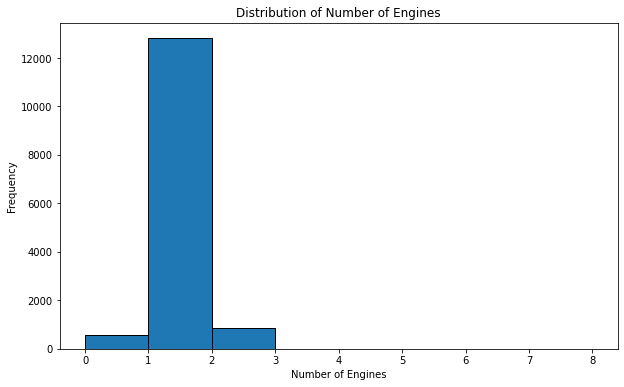

In [115]:
import matplotlib.pyplot as plt

# To ensure that the column is in integer format
df4['Number.of.Engines'] = df4['Number.of.Engines'].astype(int)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df4['Number.of.Engines'], bins=range(df4['Number.of.Engines'].min(), df4['Number.of.Engines'].max() + 1), edgecolor='black')

# Customize the plot
plt.title('Distribution of Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.xticks(range(df4['Number.of.Engines'].min(), df4['Number.of.Engines'].max() + 1))

# Show the plot
plt.show()

In [70]:
# The histogram has one peak which means that most of the planes tend to have similar value for the Number.of.Engines..
# for the plane with one engine it has the highest peak which further means that its the most common number of engines..

#From the graph its evident that most of the Airplanes engines fall from the range 0.0 - 3.0. I have also observed that from
# the range there are no probable outliers since these engines numbers fall within the specified range ..

# From the analysis its noted that most of the Airplanes have fewer engines with exception of but few which might be having 
# significantly more number of engines..


#RECOMMENDATIONS... # for this company i would recommend that we purchase the Airplanes with few Number of Engines since 
# they have shown significant number of Airplanes considering them for both Private and Commercial enterprises

In [116]:
# Analysis of the Make feature.
df4["Make"].value_counts()

CESSNA                  2563
PIPER                   1648
Cessna                  1216
Piper                    700
BEECH                    591
                        ... 
COVELL KEVIN SCOTT         1
BAGLEY CURTIS LYNN         1
EVEKTOR AEROTECHNIK        1
THUNDERBIRD AVIATION       1
WASZAK ARTHUR B            1
Name: Make, Length: 3399, dtype: int64

In [117]:
# To convert the string to lower case..
df4["Make"].str.lower()

31353           robinson
42691              piper
49991              beech
50289              piper
50349              piper
              ...       
88638    waszak arthur b
88639             cessna
88647             cessna
88661              beech
88767           luscombe
Name: Make, Length: 14278, dtype: object

In [118]:
# To capitalize the first letter in each row
df4["Make"].str.capitalize()

31353           Robinson
42691              Piper
49991              Beech
50289              Piper
50349              Piper
              ...       
88638    Waszak arthur b
88639             Cessna
88647             Cessna
88661              Beech
88767           Luscombe
Name: Make, Length: 14278, dtype: object

In [119]:
df4.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation,Event.Year
31353,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,0,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX,1992
42691,20001208X08803,Accident,1997-09-14,"St. Ignaces, MI",United States,45.928334,-84.825556,Fatal(2),Destroyed,Airplane,...,1,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause,MI,1997
49991,20010206X00396,Accident,2001-01-24,"Nashville, TN",United States,36.13,-86.653889,Fatal(4),Destroyed,Airplane,...,2,Turbo Prop,Business,4.0,0.0,0.0,0.0,Probable Cause,TN,2001
50289,20010405X00697,Accident,2001-03-30,"CROSS CITY, FL",United States,29.635555,-83.104722,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Personal,0.0,0.0,2.0,0.0,Probable Cause,FL,2001
50349,20010417X00765,Accident,2001-04-09,"Vero Beach, FL",United States,27.649722,-80.439166,Fatal(2),Destroyed,Airplane,...,1,Turbo Prop,Personal,2.0,0.0,0.0,0.0,Probable Cause,FL,2001


In [76]:
df4['Make'].unique()

array(['Robinson', 'Piper', 'Beech', ..., 'MOSSMAN MICHAEL D',
       'HIBBARD NORMAN E', 'WASZAK ARTHUR B'], dtype=object)

In [77]:
# Creating a new df which summarizes the average number of engines for each aircraft make in df4
grouped_df4 = df4.groupby('Make')['Number.of.Engines'].mean().reset_index()
grouped_df4


,Make,Number.of.Engines
0,1200,0.0
1,177MF LLC,1.0
2,2021FX3 LLC,1.0
3,781569 INC,1.0
4,A. Schleicher GMBH & Co.,0.0
...,...,...
3381,Ziermann,1.0
3382,Zlin,1.0
3383,Zlin Aviation,1.0
3384,de Havilland,1.0


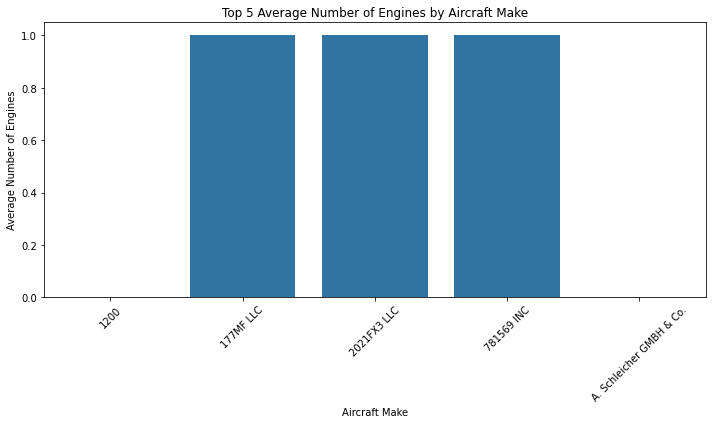

In [78]:
# Creating a bar plot with Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x = 'Make', y = 'Number.of.Engines', data = grouped_df4.head(5))

# Customize the plot
plt.title('Top 5 Average Number of Engines by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Average Number of Engines')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.tight_layout()
# Show the plot
plt.show()

In [79]:
df3['Make']

31353           Robinson
42691              Piper
49991              Beech
50289              Piper
50349              Piper
              ...       
88638    WASZAK ARTHUR B
88639             CESSNA
88647             CESSNA
88661              BEECH
88767           LUSCOMBE
Name: Make, Length: 14278, dtype: object

In [80]:
# group purpose of flight and make then count the number of flights for each Make..
purpose_df4 = df4.groupby(['Purpose.of.flight', 'Make']).size().reset_index(name = 'Count_of_Flights')
purpose_df4

,Purpose.of.flight,Make,Count_of_Flights
0,Business,AERO COMMANDER,2
1,Business,AERO VODOCHODY,1
2,Business,AEROSPATIALE,2
3,Business,AEROSTAR INTERNATIONAL,1
4,Business,AIR TRACTOR,1
...,...,...,...
3507,Public Aircraft - Local,MD HELICOPTER INC,2
3508,Public Aircraft - Local,Mcdonnell Douglas Helicopter,1
3509,Public Aircraft - Local,Mcdonnell Douglas Helicopters,1
3510,Public Aircraft - Local,PIPER,2


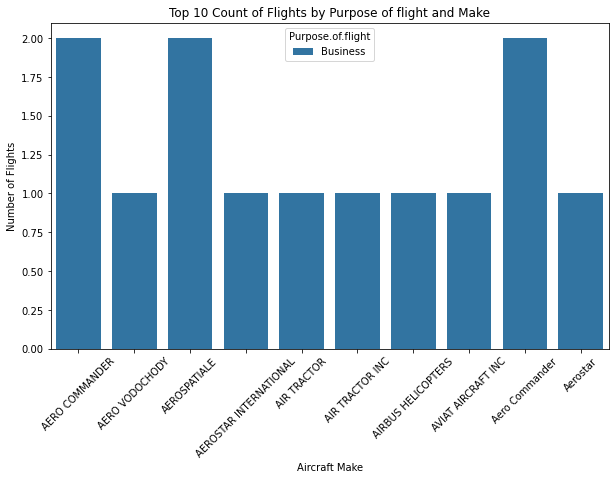

In [81]:
# Creating a barplot visualizaing Number of flights for each make and purpose of flight..
plt.figure(figsize = (10, 6))
sns.barplot (x = 'Make', y = 'Count_of_Flights', hue = 'Purpose.of.flight', data = purpose_df4.head(10))
plt.title('Top 10 Count of Flights by Purpose of flight and Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Flights')
plt.xticks(rotation = 45)
plt.show()

In [82]:
# From the analysis there is more preference for the Business in the purpose of flight within the top 10 which further 
# indicates more demand for the flights in the Business category

# For commercial enterprise, my recommendation would be to invest more in Aero Commander make due to its highest 
# number of flights recorded..

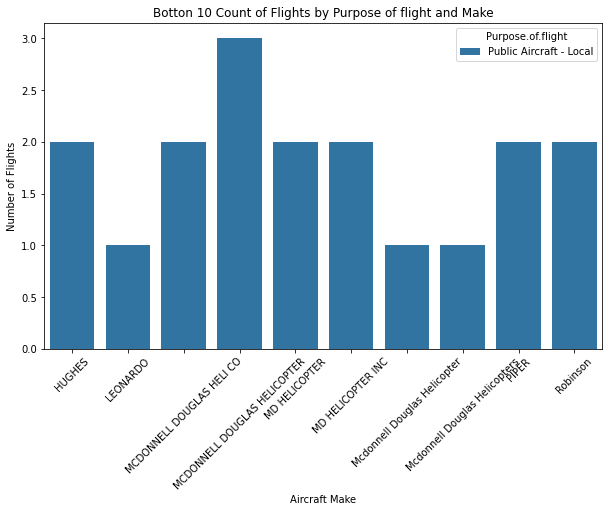

In [83]:
# Creating a barplot visualizaing Number of flights for each make and purpose of flight for the bottom counts of flights..
plt.figure(figsize = (10, 6))
sns.barplot (x = 'Make', y = 'Count_of_Flights', hue = 'Purpose.of.flight', data = purpose_df4.tail(10))
plt.title('Botton 10 Count of Flights by Purpose of flight and Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Flights')
plt.xticks(rotation = 45)
plt.show()

In [84]:
# From the analysis there is more preference for the Public Aircraft - Local in the purpose of flight within the 
# bottom 10 further indicating more demand for the flights in the Public Aircraft.

# For commercial enterprise, my recommendation would be to invest more in MCDONNELL DOUGLAS HELI CO make due to its highest 
# number of flights recorded..

In [85]:
# To reset the index of the dataframe..
df4 = df4.reset_index()

In [86]:
df4.head()

,index,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation,Event.Year
0,31353,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,...,0,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX,1992
1,42691,20001208X08803,Accident,1997-09-14,"St. Ignaces, MI",United States,45.928334,-84.825556,Fatal(2),Destroyed,...,1,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause,MI,1997
2,49991,20010206X00396,Accident,2001-01-24,"Nashville, TN",United States,36.13,-86.653889,Fatal(4),Destroyed,...,2,Turbo Prop,Business,4.0,0.0,0.0,0.0,Probable Cause,TN,2001
3,50289,20010405X00697,Accident,2001-03-30,"CROSS CITY, FL",United States,29.635555,-83.104722,Non-Fatal,Substantial,...,1,Reciprocating,Personal,0.0,0.0,2.0,0.0,Probable Cause,FL,2001
4,50349,20010417X00765,Accident,2001-04-09,"Vero Beach, FL",United States,27.649722,-80.439166,Fatal(2),Destroyed,...,1,Turbo Prop,Personal,2.0,0.0,0.0,0.0,Probable Cause,FL,2001


In [142]:
# assigning safety weightage
Fatal = 6
Serious = 3
Minor = 1

# calculating safety score..
df4['Safety_Score'] =   (df4['Total.Fatal.Injuries'] * Fatal
                                  + df4['Total.Serious.Injuries'] * Serious
                                  + df4['Total.Minor.Injuries'] * Minor)
df4['Safety_Score']

31353     9.0
42691    12.0
49991    24.0
50289     2.0
50349    12.0
         ... 
88638     0.0
88639     0.0
88647     0.0
88661     0.0
88767     0.0
Name: Safety_Score, Length: 14278, dtype: float64

In [143]:
df4.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation,Event.Year,Safety_Score
31353,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX,1992,9.0
42691,20001208X08803,Accident,1997-09-14,"St. Ignaces, MI",United States,45.928334,-84.825556,Fatal(2),Destroyed,Airplane,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause,MI,1997,12.0
49991,20010206X00396,Accident,2001-01-24,"Nashville, TN",United States,36.13,-86.653889,Fatal(4),Destroyed,Airplane,...,Turbo Prop,Business,4.0,0.0,0.0,0.0,Probable Cause,TN,2001,24.0
50289,20010405X00697,Accident,2001-03-30,"CROSS CITY, FL",United States,29.635555,-83.104722,Non-Fatal,Substantial,Airplane,...,Reciprocating,Personal,0.0,0.0,2.0,0.0,Probable Cause,FL,2001,2.0
50349,20010417X00765,Accident,2001-04-09,"Vero Beach, FL",United States,27.649722,-80.439166,Fatal(2),Destroyed,Airplane,...,Turbo Prop,Personal,2.0,0.0,0.0,0.0,Probable Cause,FL,2001,12.0


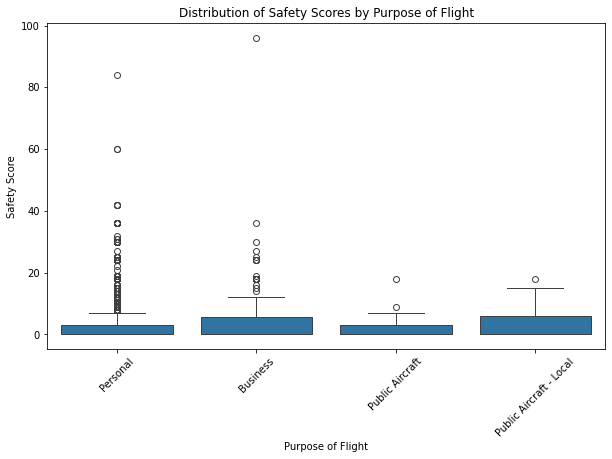

In [144]:
# Creating a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purpose.of.flight', y='Safety_Score', data = df4)

# Customize the plot
plt.title('Distribution of Safety Scores by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Safety Score')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

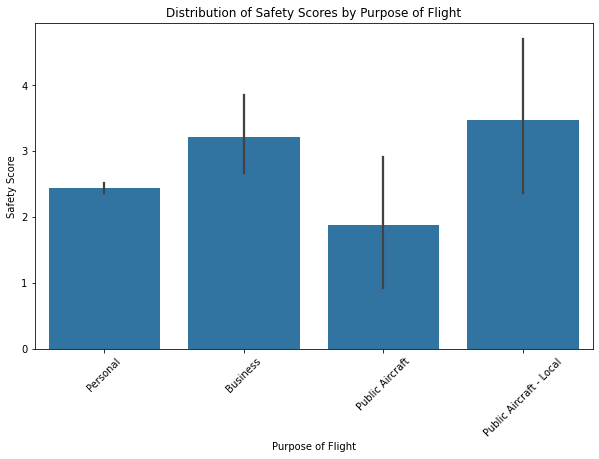

In [90]:
# Creating a box plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Purpose.of.flight', y='Safety_Score', data = df4)

# Customize the plot
plt.title('Distribution of Safety Scores by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Safety Score')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

In [145]:
df5 = df4.copy()

In [146]:
df5.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation,Event.Year,Safety_Score
31353,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX,1992,9.0
42691,20001208X08803,Accident,1997-09-14,"St. Ignaces, MI",United States,45.928334,-84.825556,Fatal(2),Destroyed,Airplane,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause,MI,1997,12.0
49991,20010206X00396,Accident,2001-01-24,"Nashville, TN",United States,36.13,-86.653889,Fatal(4),Destroyed,Airplane,...,Turbo Prop,Business,4.0,0.0,0.0,0.0,Probable Cause,TN,2001,24.0
50289,20010405X00697,Accident,2001-03-30,"CROSS CITY, FL",United States,29.635555,-83.104722,Non-Fatal,Substantial,Airplane,...,Reciprocating,Personal,0.0,0.0,2.0,0.0,Probable Cause,FL,2001,2.0
50349,20010417X00765,Accident,2001-04-09,"Vero Beach, FL",United States,27.649722,-80.439166,Fatal(2),Destroyed,Airplane,...,Turbo Prop,Personal,2.0,0.0,0.0,0.0,Probable Cause,FL,2001,12.0


In [147]:
# .merge() .. joins the two DataFrame within their index..
df5 = df4.merge(df, on = "Abbreviation") # extract Abbreviation from the df dataset..
df5.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation,Event.Year,Safety_Score
0,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX,1992,9.0
1,20020123X00101,Accident,2002-01-15,"IRAAN, TX",United States,30.905556,-101.891944,Non-Fatal,Substantial,Airplane,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,Probable Cause,TX,2002,0.0
2,20020717X01146,Accident,2002-07-13,"SPICEWOOD, TX",United States,30.501111,-98.146944,Non-Fatal,Substantial,Airplane,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,Probable Cause,TX,2002,0.0
3,20030109X00041,Accident,2003-01-08,"GROESBECK, TX",United States,31.639722,-96.514722,Non-Fatal,Substantial,Airplane,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,Probable Cause,TX,2003,0.0
4,20030512X00642,Accident,2003-05-12,"ROBINSON, TX",United States,31.501944,-97.080834,Non-Fatal,Substantial,Helicopter,...,Reciprocating,Personal,0.0,0.0,1.0,0.0,Probable Cause,TX,2003,1.0


In [148]:
df5.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Latitude', 'Longitude', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Report.Status',
       'Abbreviation', 'Event.Year', 'Safety_Score'],
      dtype='object')

In [149]:
safe_metrics = df5[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]

In [152]:
# Grouping data by 'Make' and 'Model' then summing uo with the injury related column..
safe_metrics = df5.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries':'sum',
    'Total.Minor.Injuries': 'sum'
}).reset_index()
safe_metric

safe_metrics['Safety_Score'] = safe_metrics['Total.Fatal.Injuries'] + safe_metrics['Total.Serious.Injuries'] + safe_metrics['Total.Minor.Injuries']

In [157]:
# sorting by safety_score to find which is the safe Aircraft... considering those with the lowest scores..
safe_aircraft = safe_metrics.sort_values(by = 'Safety_Score', ascending = True)
safe_aircraft.head(10)

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Safety_Score
1724,Cessna,337 B,0.0,0.0,0.0,0.0
4484,Piper,PA-32-301XTC,0.0,0.0,0.0,0.0
4482,Piper,PA-32-301,0.0,0.0,0.0,0.0
2151,EDWARD W GRAY,LANCAIR 360,0.0,0.0,0.0,0.0
4479,Piper,PA-32,0.0,0.0,0.0,0.0
4478,Piper,PA-31T,0.0,0.0,0.0,0.0
2156,EIPPER FORMANCE INC,MXII,0.0,0.0,0.0,0.0
2157,EIRIAVION OY,PIK 20B,0.0,0.0,0.0,0.0
4476,Piper,PA-31-350,0.0,0.0,0.0,0.0
2159,ELDRIDGE GEORGE,SKYSTAR KITFOX SER 7,0.0,0.0,0.0,0.0


In [ ]:
safe_aircraft = safe_metrics.sort_values(by = 'Safety_Score', ascending = True)

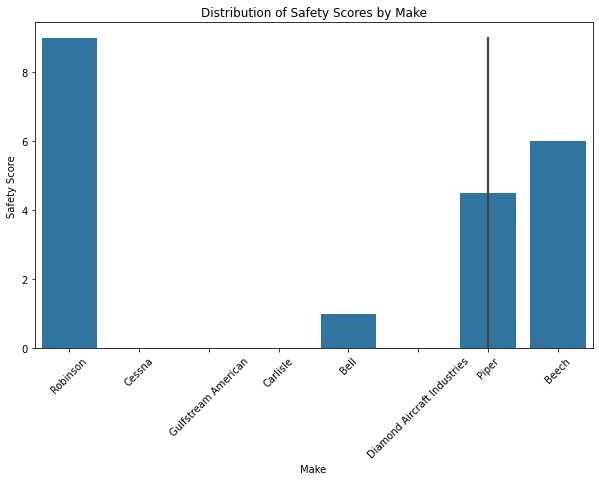

In [167]:
# Creating a box plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Make', y='Safety_Score', data = df5.head(10))

plt.title('Distribution of Safety Scores by Make')
plt.xlabel('Make')
plt.ylabel('Safety Score')
plt.xticks(rotation=45)  
plt.show()


In [127]:
# creating a cleaned csv file..
cleaned_df5 = df5
cleaned_df5.to_csv('cleaned_data2.csv', index = False)

In [128]:
df5.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Abbreviation,Event.Year
0,20170710X10920,Accident,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Fatal(1),Destroyed,Helicopter,...,0,Reciprocating,Personal,1.0,1.0,0.0,0.0,Probable Cause,TX,1992
1,20020123X00101,Accident,2002-01-15,"IRAAN, TX",United States,30.905556,-101.891944,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Personal,0.0,0.0,0.0,1.0,Probable Cause,TX,2002
2,20020717X01146,Accident,2002-07-13,"SPICEWOOD, TX",United States,30.501111,-98.146944,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Personal,0.0,0.0,0.0,1.0,Probable Cause,TX,2002
3,20030109X00041,Accident,2003-01-08,"GROESBECK, TX",United States,31.639722,-96.514722,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Personal,0.0,0.0,0.0,1.0,Probable Cause,TX,2003
4,20030512X00642,Accident,2003-05-12,"ROBINSON, TX",United States,31.501944,-97.080834,Non-Fatal,Substantial,Helicopter,...,1,Reciprocating,Personal,0.0,0.0,1.0,0.0,Probable Cause,TX,2003


In [94]:
#df1_cleaned = df1.dropna(subset=['Aircraft.Categ])

In [95]:
#df1_cleaned = df1.dropna(subset=['Aircraft.Category', 'Injury.Severity', 'Location'])

In [ ]:
df1.isnull().sum().sort_values(ascending = False)